In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
bankdata = pd.read_csv("/content/bill_authentication.csv")

In [7]:
print(bankdata.shape)
bankdata.head()

(1372, 5)


,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [8]:
X = bankdata.drop('Class', axis=1)
y = bankdata['Class']
print(X)
print(y)

      Variance  Skewness  Curtosis  Entropy
0      3.62160   8.66610   -2.8073 -0.44699
1      4.54590   8.16740   -2.4586 -1.46210
2      3.86600  -2.63830    1.9242  0.10645
3      3.45660   9.52280   -4.0112 -3.59440
4      0.32924  -4.45520    4.5718 -0.98880
...        ...       ...       ...      ...
1367   0.40614   1.34920   -1.4501 -0.55949
1368  -1.38870  -4.87730    6.4774  0.34179
1369  -3.75030 -13.45860   17.5932 -2.77710
1370  -3.56370  -8.38270   12.3930 -1.28230
1371  -2.54190  -0.65804    2.6842  1.19520

[1372 rows x 4 columns]
0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
len(y_train)

1097

In [10]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [11]:
y_pred = svclassifier.predict(X_test)
print(y_pred)

[0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1
 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0
 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0
 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1]


In [33]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(y_train)

[[153   3]
 [  1 118]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       156
           1       0.98      0.99      0.98       119

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

1179    1
855     1
560     0
471     0
220     0
       ..
1333    1
613     0
872     1
1318    1
1237    1
Name: Class, Length: 1097, dtype: int64


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


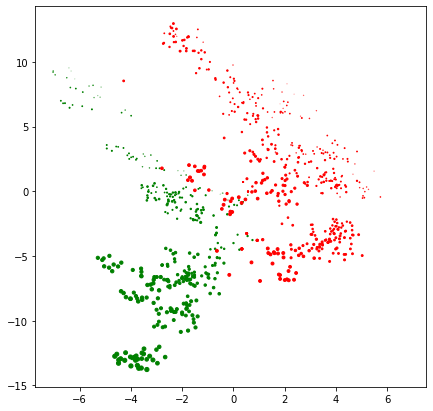

In [13]:
plt.figure(figsize=(7, 7))
ax = plt.subplot()
ax.scatter(bankdata[bankdata['Class'] == 1]['Variance'], bankdata[bankdata['Class'] == 1]['Skewness'], c='green', s=bankdata[bankdata['Class'] == 1]['Curtosis'])
ax.scatter(bankdata[bankdata['Class'] == 0]['Variance'], bankdata[bankdata['Class'] == 0]['Skewness'], c='red', s=bankdata[bankdata['Class'] == 0]['Curtosis']);

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


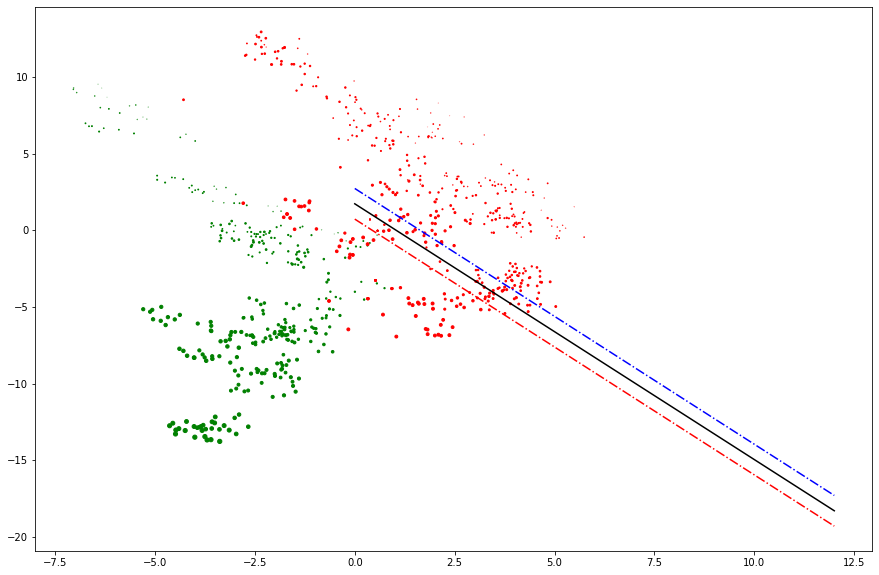

In [37]:
# plot the decision boundary ,data points,support vector etcv
w = svclassifier.coef_[0]
a = -w[0] / w[1]
 
xx = np.linspace(0,12)
yy = a * xx - svclassifier.intercept_[0] / w[1]
y_neg = a * xx - svclassifier.intercept_[0] / w[1] + 1
y_pos = a * xx - svclassifier.intercept_[0] / w[1] - 1
plt.figure(1,figsize= (15, 10))
plt.plot(xx, yy, 'k',
         label=f"Decision Boundary (y ={w[0]}x1  + {w[1]}x2  {svclassifier.intercept_[0] })")
plt.plot(xx, y_neg, 'b-.',
         label=f"Neg Decision Boundary (-1 ={w[0]}x1  + {w[1]}x2  {svclassifier.intercept_[0] })")
plt.plot(xx, y_pos, 'r-.',
         label=f"Pos Decision Boundary (1 ={w[0]}x1  + {w[1]}x2  {svclassifier.intercept_[0] })")


plt.scatter(bankdata[bankdata['Class'] == 1]['Variance'], bankdata[bankdata['Class'] == 1]['Skewness'], c='green', s=bankdata[bankdata['Class'] == 1]['Curtosis'])
plt.scatter(bankdata[bankdata['Class'] == 0]['Variance'], bankdata[bankdata['Class'] == 0]['Skewness'], c='red', s=bankdata[bankdata['Class'] == 0]['Curtosis']);
plt.show()
 

In [14]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt

In [15]:
iris = datasets.load_iris()

In [16]:
X = iris.data[:, :2]
y = iris.target
print(X)
print(y)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

In [17]:
C = 1.0

In [18]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X_plot = np.c_[xx.ravel(), yy.ravel()]

In [19]:
svc_classifier = svm.SVC(kernel='linear', C=C).fit(X, y)

Text(0.5, 1.0, 'Support Vector Classifier with linear kernel')

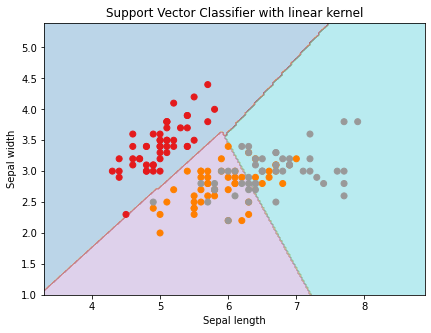

In [20]:
Z = svc_classifier.predict(X_plot)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Classifier with linear kernel')